In [0]:
from google.colab import files


In [0]:
files.upload()

{}

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
data=pd.read_csv('SONATSOFTW.csv')

In [0]:
data['Date']=pd.to_datetime(data['Date'])

In [0]:
data.head()

Symbol Series  ... Deliverable Qty  % Dly Qt to Traded Qty
0  SONATSOFTW     EQ  ...           35924                   67.29
1  SONATSOFTW     EQ  ...          155739                   57.55
2  SONATSOFTW     EQ  ...           37437                   65.73
3  SONATSOFTW     EQ  ...           85633                   50.57
4  SONATSOFTW     EQ  ...          117644                   70.21

[5 rows x 15 columns]

In [0]:
datanew=data.set_index('Date')

Text(0, 0.5, 'Close Price')

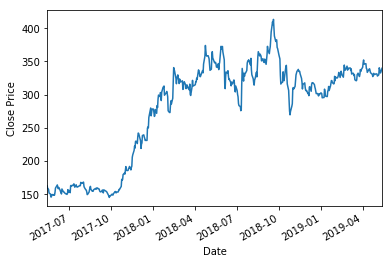

In [0]:
datanew['Close Price'].plot()
plt.xlabel('Date')
plt.ylabel('Close Price')

In [0]:
Daily_Mean_Return=datanew['Close Price'].pct_change().mean()


In [0]:
Daily_Mean_Return


0.001810545966237806

In [0]:
Daily_Std_Return=datanew['Close Price'].pct_change().std()
Daily_Std_Return

0.02531963807302777

Daily return of the stock

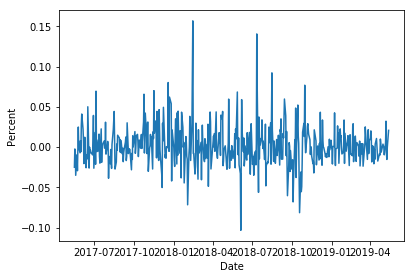

In [0]:
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.plot(datanew['Close Price'].pct_change())
ax1.set_xlabel("Date")
ax1.set_ylabel("Percent")
plt.show()

In [0]:
!ls

 HINDALCO.csv   RELIANCE.csv   SONATSOFTW.csv
'M&M.csv'       sample_data    WELSPUNIND.csv


In [0]:
data1=pd.read_csv('HINDALCO.csv')
data2=pd.read_csv('M&M.csv')
data3=pd.read_csv('SONATSOFTW.csv')
data4=pd.read_csv('WELSPUNIND.csv')
data5=pd.read_csv('RELIANCE.csv')

In [0]:
data1['Date']=pd.to_datetime(data1['Date'])
data1=data1.set_index('Date')
data2['Date']=pd.to_datetime(data2['Date'])
data2=data2.set_index('Date')
data3['Date']=pd.to_datetime(data3['Date'])
data3=data3.set_index('Date')
data4['Date']=pd.to_datetime(data4['Date'])
data4=data4.set_index('Date')
data5['Date']=pd.to_datetime(data5['Date'])
data5=data5.set_index('Date')

In [0]:
Name=['HINDALCO.csv','M&M.csv','SONATSOFTW.csv','WELSPUNIND.csv','RELIANCE.csv']

Plotting closing price of each stock

Text(0.5, 1.0, 'RELIANCE.csv')

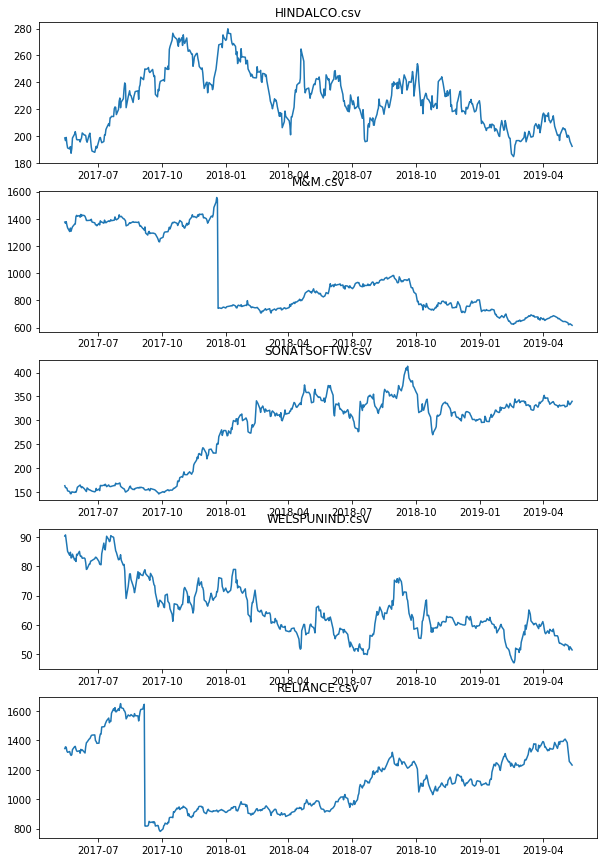

In [0]:
fig,ax=plt.subplots(5,1,figsize=(10,15))
ax[0].plot(data1['Close Price'])
ax[0].set_title(Name[0])
ax[1].plot(data2['Close Price'])
ax[1].set_title(Name[1])
ax[2].plot(data3['Close Price'])
ax[2].set_title(Name[2])
ax[3].plot(data4['Close Price'])
ax[3].set_title(Name[3])
ax[4].plot(data5['Close Price'])
ax[4].set_title(Name[4])

In [0]:
data1=pd.read_csv('HINDALCO.csv')
data2=pd.read_csv('M&M.csv')
data3=pd.read_csv('SONATSOFTW.csv')
data4=pd.read_csv('WELSPUNIND.csv')
data5=pd.read_csv('RELIANCE.csv')

In [0]:
dict={'HINDALCO':data1['Close Price'],'M&M':data2['Close Price'],'SONATSOFTW':data3['Close Price'],'WELSPUNIND':data4['Close Price'],'RELIANCE':data5['Close Price']}

In [0]:
Portfolio=pd.DataFrame(dict)


##convert daily stock prices into daily returns

In [0]:
returns=Portfolio.pct_change()

In [0]:
mean_daily_returns = returns.mean()
cov_data=returns.cov()

In [0]:
num_portfolios = 25000
results = np.zeros((4+4,num_portfolios))
for i in range(num_portfolios):
    weights = np.array(np.random.random(5))
    weights /= np.sum(weights)
    #calculate portfolio return and volatility
    portfolio_return = np.sum(mean_daily_returns * weights) * 252
    portfolio_std_dev = np.sqrt(np.dot(weights.T,np.dot(cov_data, weights))) * np.sqrt(252)
    
    #store results in results array
    results[0,i] = portfolio_return
    results[1,i] = portfolio_std_dev
    #store Sharpe Ratio (return / volatility)
    results[2,i] = results[0,i] / results[1,i]
    #iterate through the weight vector and add data to results array
    for j in range(len(weights)):
        results[j+3,i] = weights[j]

In [0]:
results.T


array([[-0.04713976,  0.23170536, -0.20344699, ...,  0.05361557,
         0.18180802,  0.33496879],
       [-0.05289551,  0.22850035, -0.23148984, ...,  0.15318669,
         0.29745373,  0.16317581],
       [-0.0737279 ,  0.23969086, -0.30759581, ...,  0.13288581,
         0.16100558,  0.10526605],
       ...,
       [ 0.04985793,  0.22334062,  0.22323717, ...,  0.28745923,
         0.27257051,  0.12142644],
       [-0.0898737 ,  0.24923653, -0.36059603, ...,  0.07280627,
         0.07852447,  0.07510698],
       [ 0.01206206,  0.21281855,  0.05667768, ...,  0.21231846,
         0.1719185 ,  0.09121798]])

In [0]:
Result_data = pd.DataFrame(results.T,columns=['ret','stdev','sharpe','HINDALCO','M&M','SONATSOFTW','WELSPUNIND','RELIANCE'])

In [0]:
max_sharpe_port = results_frame.iloc[results_frame['sharpe'].idxmax()]

In [0]:
min_vol_port = results_frame.iloc[results_frame['stdev'].idxmin()]

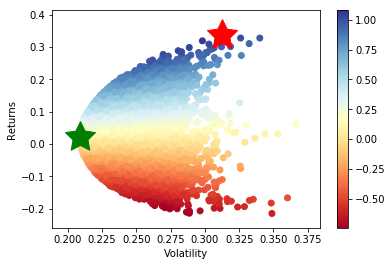

In [0]:
plt.scatter(results_frame.stdev,results_frame.ret,c=results_frame.sharpe,cmap='RdYlBu')
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.colorbar()
plt.scatter(max_sharpe_port[1],max_sharpe_port[0],marker=(5,1,0),color='r',s=1000)
plt.scatter(min_vol_port[1],min_vol_port[0],marker=(5,1,0),color='g',s=1000)